# Función XOR

En este cuaderno vamos a utilizar Keras para implementar una red neuronal que implementa la función lógica XOR. Este es un ejemplo clásico de redes neuronales por dos motivos: 
- Se utiliza una red neuronal de dos entradas, una capa oculta y una capa de salida con funciones de activación no lineales. 
- Cada una de las neuronas aprende una función lineal, pero la combinación (la red neuronal en sí misma) aprende una función no lineal. 
    - Esta representación nos muestra que las redes neuronales pueden comportarse en cierta forma como compuertas lógicas para aprender comportamientos no lineales presentes en los datos. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
keras.__version__

'2.2.4-tf'

## Definición de entradas para función XOR

Vamos a crear un conjunto de datos de entrada y las respectivas salidas para mostrárselas a la red neuronal: 

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([0, 1, 1, 0], dtype=np.float32)[:, None]
X.shape, Y.shape

((4, 2), (4, 1))

In [4]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [5]:
Y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

## Modelo en Keras

In [6]:
model = keras.Sequential([
    keras.layers.Dense(2, activation='sigmoid', bias_initializer=tf.constant_initializer(0), input_shape=(2,), name='ands'), 
    keras.layers.Dense(1, activation='sigmoid', name='or')
], name="xor_model")

model.summary()

Model: "xor_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ands (Dense)                 (None, 2)                 6         
_________________________________________________________________
or (Dense)                   (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.weights

[<tf.Variable 'ands/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.70866275, -0.44212103],
        [ 0.9066988 ,  0.86902463]], dtype=float32)>,
 <tf.Variable 'ands/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'or/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.3651047 ],
        [-0.19877493]], dtype=float32)>,
 <tf.Variable 'or/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [8]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.learning_rate.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

In [10]:
history = model.fit(x=X, y=Y, epochs=1000, verbose=1)

1.0000
Epoch 805/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 806/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 807/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 808/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 809/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 810/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0136 - accuracy: 1.0000
Epoch 811/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0135 - accuracy: 1.0000
Epoch 812/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0135 - accuracy: 1.0000
Epoch 813/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0135 - accuracy: 1.0000
Epoch 814/1000
4/4 [==============================] - 0s 3ms/sample - loss:

Con esto, obtenemos los valores del modelo entrenado para aprender la función XOR

In [11]:
model.predict(X)

array([[0.01021441],
       [0.9881661 ],
       [0.98763716],
       [0.00998514]], dtype=float32)

## Función de pérdida

Veamos una gráfica de la función de pérdida en función del número de *epochs* de entrenamiento.

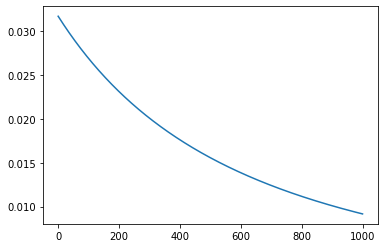

In [241]:
plt.plot(history.history['loss'])

## Límites de decisión

Los límites de decisión representan la región de clasificación para los diferentes valores de entrada. Representan la salida de la red neuronal de la siguiente forma: 
- en color **rojo** los puntos para los cuales la red neuronal daría una predicción de $1$.
- en color **azul** los puntos para los cuales la red neuronal daría una predicción de $0$.

In [12]:
X1, X2 = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
X_area = np.hstack( (X1.flatten()[:, None], X2.flatten()[:, None]) )
Y_area = model.predict(X_area)

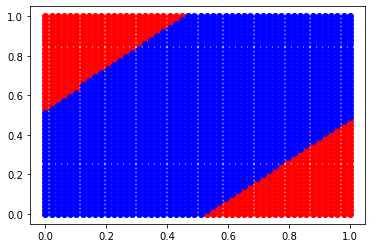

In [13]:
filtro = Y_area[:,0] > 0.5
plt.plot(X1.flatten()[filtro], X2.flatten()[filtro], 'ro')
plt.plot(X1.flatten()[filtro == False], X2.flatten()[filtro == False], 'bo')